In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('world-happiness-report-2021.csv')
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [22]:
cols = [i for i in list(df.columns) if not i.startswith('Explained')]
cols.remove('Standard error of ladder score')
cols.remove('upperwhisker')
cols.remove('lowerwhisker')

In [23]:
# new_cols = ['Country name',
#  'Regional indicator',
#  'Happiness score',
#  'GDP per capita',
#  'Social support',
#  'Healthy life expectancy',
#  'Freedom to make life choices',
#  'Generosity',
#  'Perceptions of corruption',
#  'Dystopia score',
#  'Dystopia + residual']

new_cols = ['Kraj',
 'Wskaźnik regionalny',
 'Poziom szczęścia',
 'PKB na mieszkańca',
 'Pomoc socjalna',
 'Długość życia w zdrowiu',
 'Swoboda w dokonywaniu życiowych wyborów',
 'Hojność',
 'Korupcja',
 'Poziom dystopii',
 'Dystopia + reszta']

In [24]:
df = df.rename(columns = dict(zip(cols, new_cols)))

In [25]:
import data_describe as dd

<AxesSubplot:title={'center':'Correlation Matrix'}>

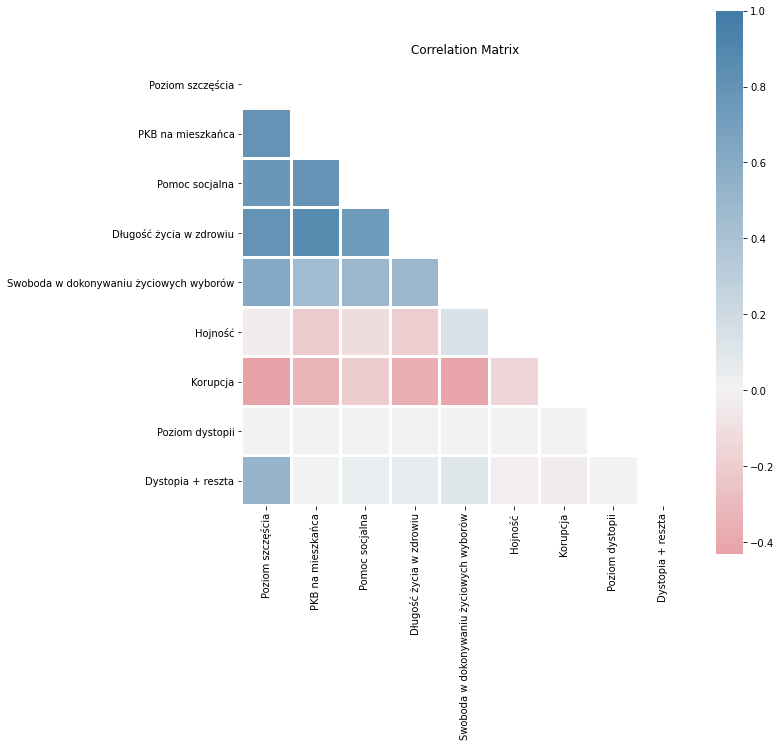

In [41]:
import matplotlib.pyplot as plt
dd.correlation_matrix(df[new_cols], cluster=False)

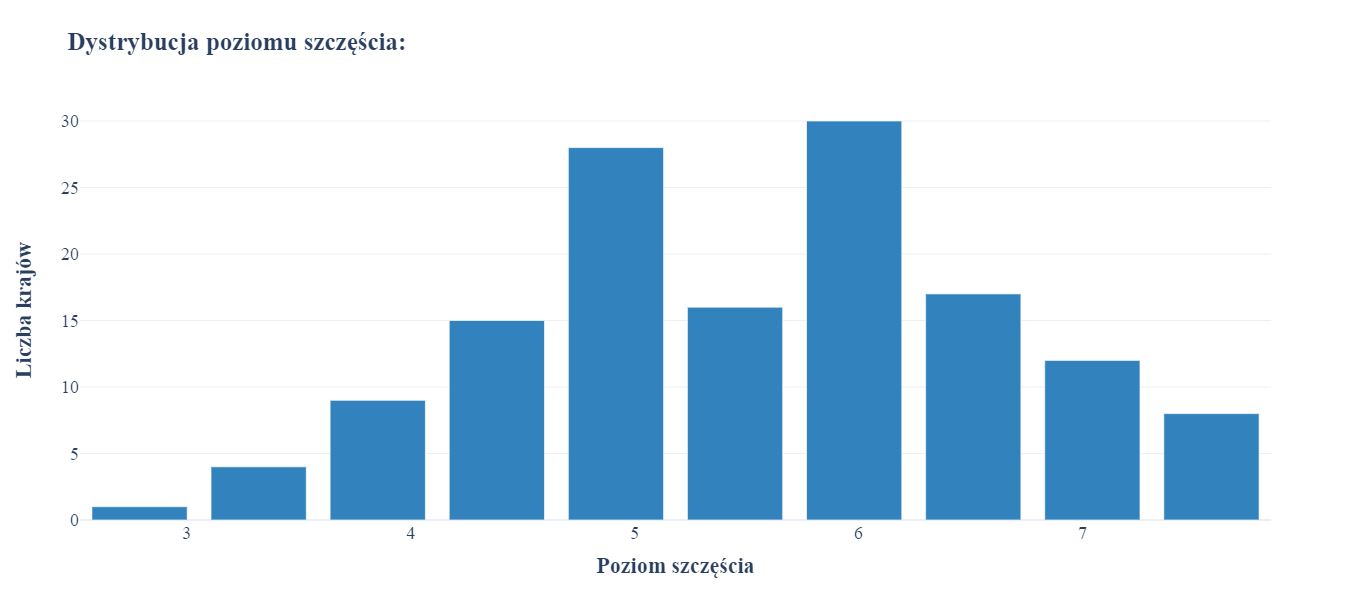

In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import numpy as np

# df['Happiness score'].hist()
template = "plotly_white"
color_1 = '#3182bd'
color_2 = '#f1a340'
#histogram ladder score
#counts, bins = np.histogram(df.Age, bins=range(0, 80, 5))
counts, bins = np.histogram(df['Poziom szczęścia'])
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, 
            labels={'x':'<b>Poziom szczęścia</b>', 'y':'<b>Liczba krajów</b>'},
            title='<b>Dystrybucja poziomu szczęścia:</b>',
            color_discrete_sequence=[color_1],
            template=template,
            width=1200, height=600)

fig.update_layout(
    font=dict(
        size=18,
        family="DIN"
    ))
fig.show()

In [9]:
import pycountry
def to_iso_code(country_name):
    try:
        code = pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    except:
        code = None
    return code

In [29]:
# to_iso_code('Poland')
df['iso']=df['Kraj'].apply(to_iso_code)

In [30]:
df.dropna(inplace=True)
df.head()

,Kraj,Wskaźnik regionalny,Poziom szczęścia,Standard error of ladder score,upperwhisker,lowerwhisker,PKB na mieszkańca,Pomoc socjalna,Długość życia w zdrowiu,Swoboda w dokonywaniu życiowych wyborów,...,Korupcja,Poziom dystopii,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + reszta,iso
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,FIN
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,DNK
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,CHE
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,ISL
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,NLD


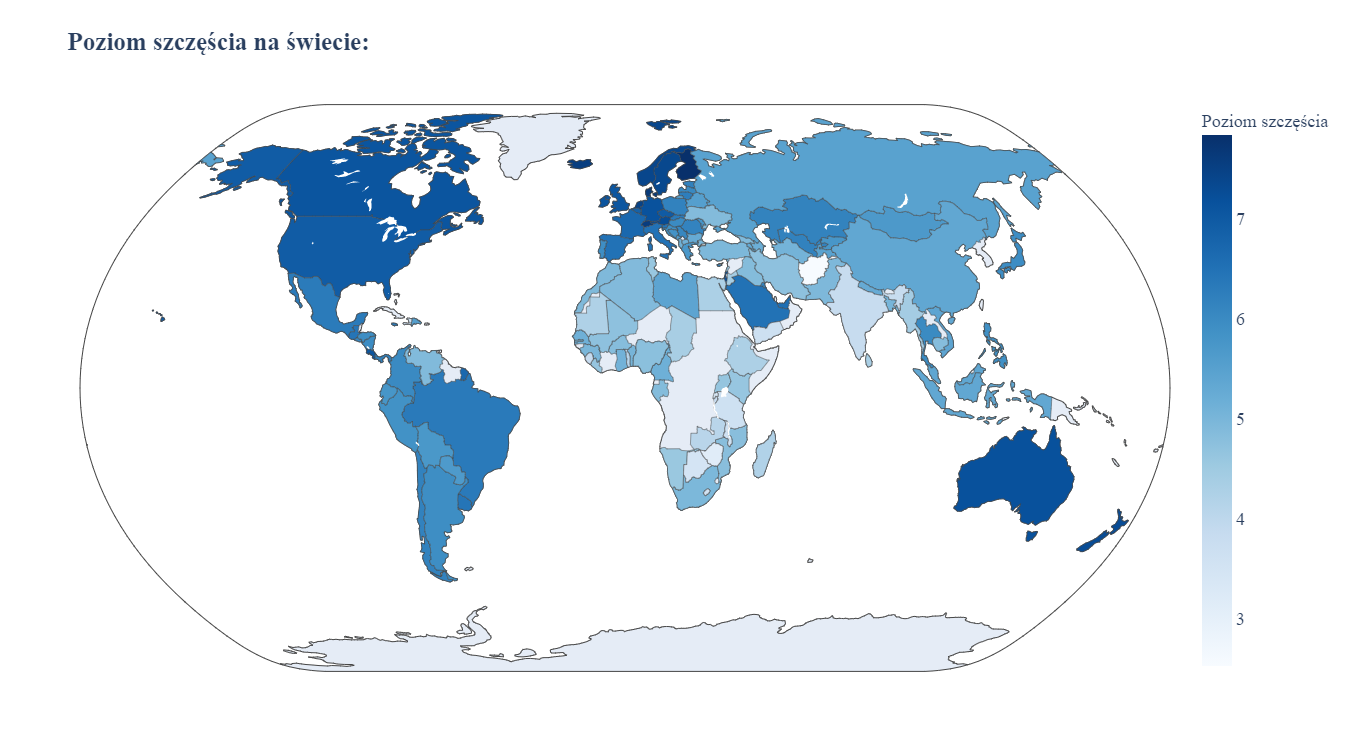

In [40]:
#mapa
import plotly.graph_objects as go
import plotly.express as px
import json
import pandas as pd
import numpy as np

fig = go.Figure(
    go.Choropleth(locations=df['iso'],
            z=df['Poziom szczęścia'],
            colorscale='blues',
            text = df['Kraj'],
            colorbar_title = 'Poziom szczęścia',
            marker_line_width=0.5
                    ))
fig.update_geos(projection_type='natural earth') # ksztalt kuli
fig.update_layout(title='<b>Poziom szczęścia na świecie:</b>',
    height=int(1080*0.7),
    width=int(1920*0.7),
    font=dict(
        size=18,
        family="DIN"
    ))
#     margin={"r":40,"t":40,"l":40,"b":0}
fig.show()

In [33]:
df.head()

,Kraj,Wskaźnik regionalny,Poziom szczęścia,Standard error of ladder score,upperwhisker,lowerwhisker,PKB na mieszkańca,Pomoc socjalna,Długość życia w zdrowiu,Swoboda w dokonywaniu życiowych wyborów,...,Korupcja,Poziom dystopii,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + reszta,iso
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,FIN
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,DNK
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,CHE
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,ISL
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,NLD


In [34]:
df[['Kraj', 'Poziom szczęścia']]

,Kraj,Poziom szczęścia
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
...,...,...
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145


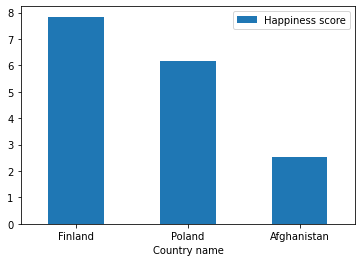

In [15]:
best_worst = df[(df["Kraj"] == 'Finland') | (df["Country name"] =='Poland') | (df["Country name"] =='Afghanistan')]
best_worst[['Country name', 'Happiness score']]
ax = best_worst.plot.bar(x='Country name', y='Happiness score', rot=0)

In [ ]:
# zadowolenie z podzialem na kontynent power BI
